In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

In [10]:
# Ensure required resources for nltk are downloaded
nltk.download('vader_lexicon')

# Load dataset
data = pd.read_excel("B:\OneDrive - Amity University\Desktop\Infosys\File\dataassign-2\dataset1.xlsx", sheet_name='Sheet1')




[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sidhe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
# General Overview
print("\n--- Missing Values ---")
print(data.isnull().sum())
print("\n--- Duplicate Entries ---")
print(data.duplicated().sum())



--- Missing Values ---
ID                     0
Name                   0
Role                   0
Transcript             0
Resume                 0
decision               0
Reason for decision    0
Job Description        0
dtype: int64

--- Duplicate Entries ---
0


C:\Users\sidhe\AppData\Local\Temp\ipykernel_19880\3352252075.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Role', data=data, order=data['Role'].value_counts().index, palette="viridis")


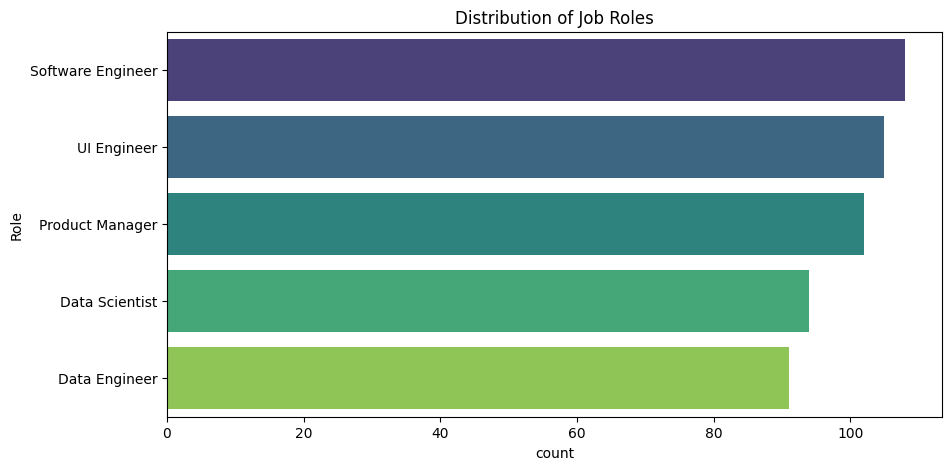

C:\Users\sidhe\AppData\Local\Temp\ipykernel_19880\3352252075.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='decision', data=data, palette="coolwarm")


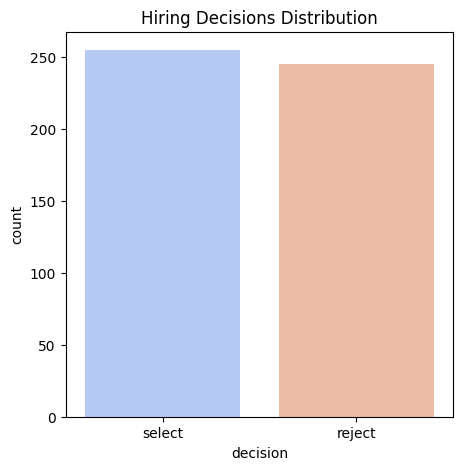

In [13]:
# Distribution of roles and decisions
plt.figure(figsize=(10, 5))
sns.countplot(y='Role', data=data, order=data['Role'].value_counts().index, palette="viridis")
plt.title('Distribution of Job Roles')
plt.show()
plt.figure(figsize=(5, 5))
sns.countplot(x='decision', data=data, palette="coolwarm")
plt.title('Hiring Decisions Distribution')
plt.show()

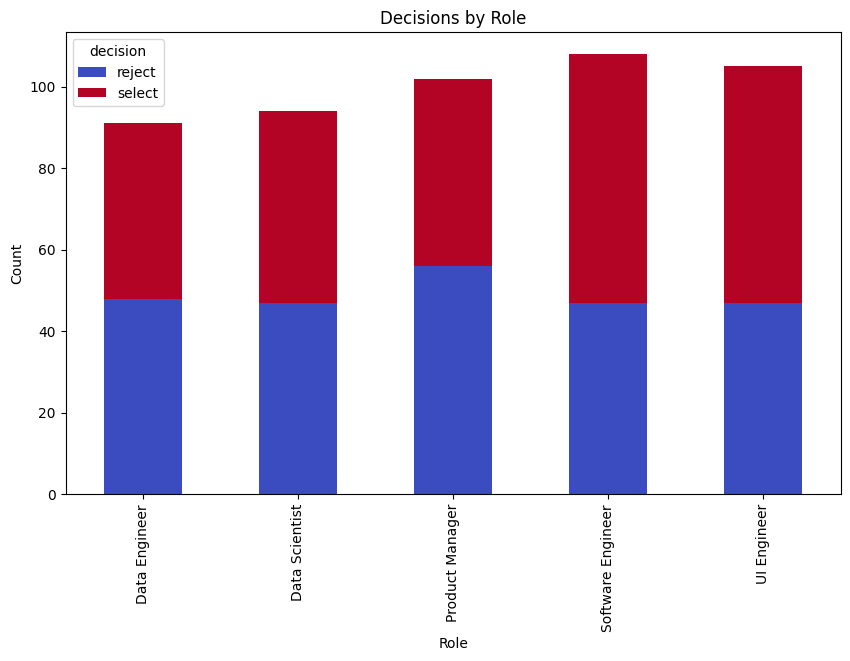

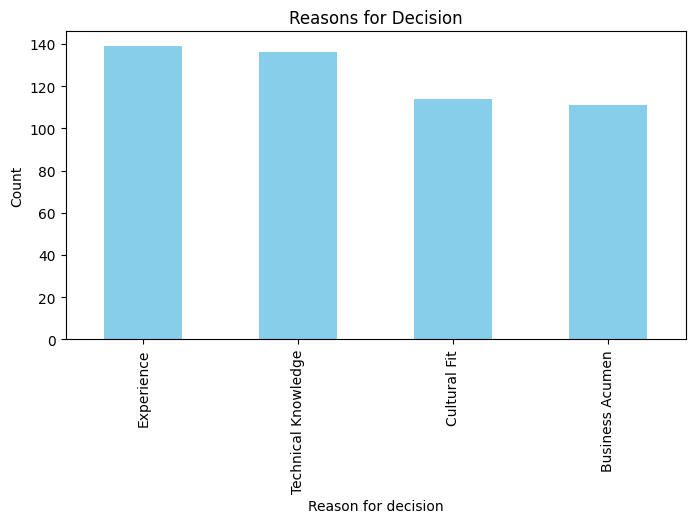

In [14]:
# Decision Analysis
role_decision = data.groupby(['Role', 'decision']).size().unstack()
role_decision.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Decisions by Role')
plt.ylabel('Count')
plt.show()

reason_decision = data['Reason for decision'].value_counts()
reason_decision.plot(kind='bar', figsize=(8, 4), color='skyblue')
plt.title('Reasons for Decision')
plt.ylabel('Count')
plt.show()

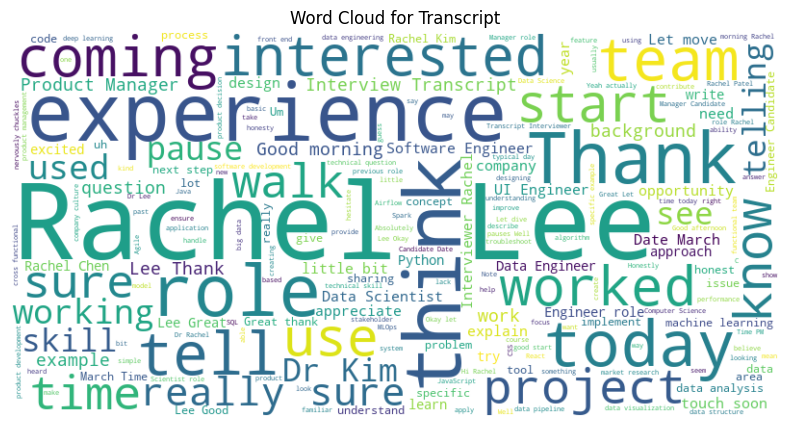

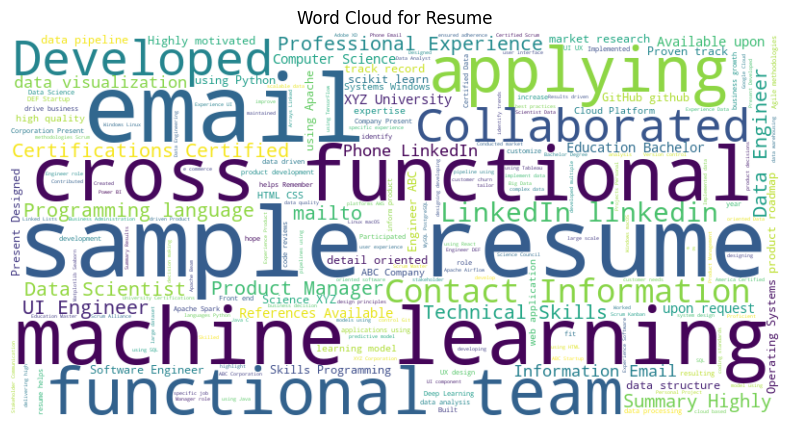

In [15]:
# Text Data Insights
# Word Cloud for Transcripts and Resumes
for column in ['Transcript', 'Resume']:
    text = " ".join(data[column].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column}')
    plt.show()

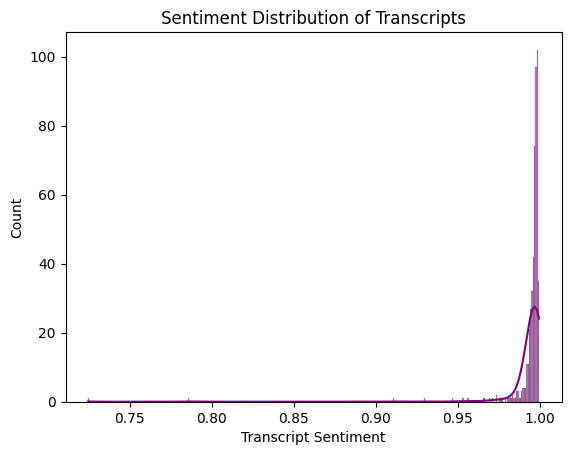

In [16]:
# Sentiment Analysis on Transcripts
sia = SentimentIntensityAnalyzer()
data['Transcript Sentiment'] = data['Transcript'].apply(lambda x: sia.polarity_scores(x)['compound'])
sns.histplot(data['Transcript Sentiment'], kde=True, color="purple")
plt.title('Sentiment Distribution of Transcripts')
plt.show()

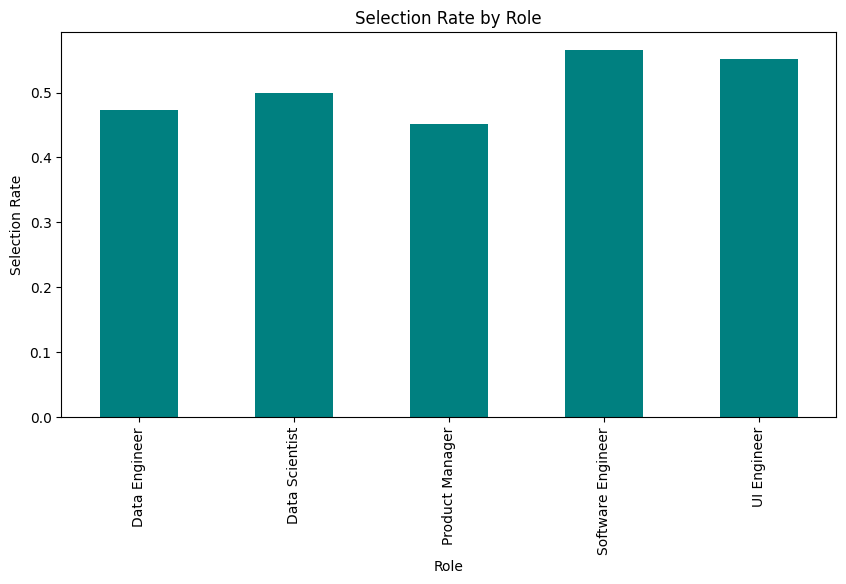

In [17]:
# Role-Specific Trends
role_selection_rate = data[data['decision'] == 'select']['Role'].value_counts() / data['Role'].value_counts()
role_selection_rate.plot(kind='bar', figsize=(10, 5), color='teal')
plt.title('Selection Rate by Role')
plt.ylabel('Selection Rate')
plt.show()

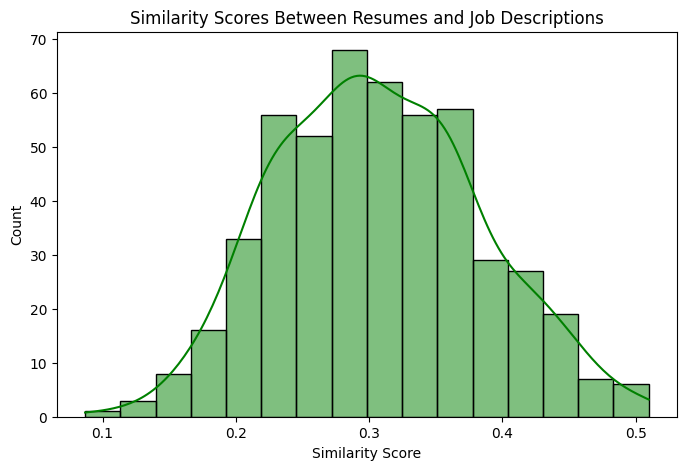

In [18]:
# Job Description and Resume Matching
def compute_similarity(row):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([row['Job Description'], row['Resume']])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]

data['Similarity Score'] = data.apply(compute_similarity, axis=1)
plt.figure(figsize=(8, 5))
sns.histplot(data['Similarity Score'], kde=True, color="green")
plt.title('Similarity Scores Between Resumes and Job Descriptions')
plt.show()

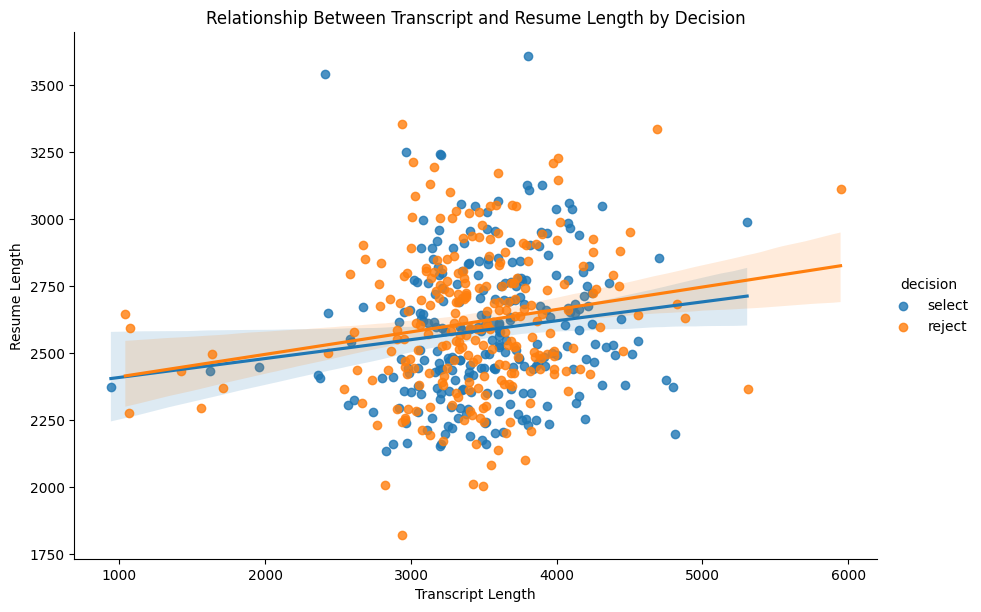

In [19]:
# Correlations
# Length of transcripts and resumes
data['Transcript Length'] = data['Transcript'].apply(len)
data['Resume Length'] = data['Resume'].apply(len)
sns.lmplot(x='Transcript Length', y='Resume Length', hue='decision', data=data, height=6, aspect=1.5)
plt.title('Relationship Between Transcript and Resume Length by Decision')
plt.show()



In [21]:
# Save enhanced dataset for further analysis
data.to_csv("B:\OneDrive - Amity University\Desktop\Infosys\File\dataassign-2\EDA_Infy.csv", index=False)
print("Enhanced dataset with additional features saved as eda_infy.csv")


Enhanced dataset with additional features saved as eda_infy.csv
